In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
import seaborn as sns
from collections import Counter
from pylab import figure, show, legend, ylabel, xlabel
import matplotlib.patches as mpatches



In [34]:
missingValues = ["n/a", "na", " ", "__"]
data1 = pd.read_csv("/Users/aniketsingh/Desktop/SeniorProject/data/site_weather.csv",na_values = missingValues)
data2 = pd.read_csv("/Users/aniketsingh/Desktop/SeniorProject/data/ele.csv",na_values = missingValues)
data1.rename(columns = {'Unnamed: 0': 'Timestamp'}, inplace = True)
data1['Timestamp'] = pd.to_datetime(data1['Timestamp'])
#data1.set_index('Timestamp', inplace=True)
# data = data.reset_index(drop = True)
#First few rows
#########
data2.rename(columns = {'Unnamed: 0': 'Timestamp'}, inplace = True)
data2['Timestamp'] = pd.to_datetime(data2['Timestamp'])
#data1.set_index('Timestamp', inplace=True)
# data = data.reset_index(drop = True)
#First few rows

In [35]:
#JOIN DATA
data = data1.merge(data2, on='Timestamp', how='left')

In [36]:
data

,Timestamp,air_temp_set_1,air_temp_set_2,dew_point_temperature_set_1d,relative_humidity_set_1,solar_radiation_set_1,mels_S,lig_S,lig_N,mels_N,hvac_N,hvac_S
0,2018-01-01 00:00:00+00:00,11.565,11.465,8.120,79.585,66.290,NaN,NaN,NaN,NaN,36.000000,22.500000
1,2018-01-01 00:30:00+00:00,11.515,11.460,8.160,80.060,36.525,NaN,NaN,NaN,NaN,37.700001,19.200001
2,2018-01-01 01:00:00+00:00,11.030,11.080,8.015,81.850,4.130,1.250000,0.200000,NaN,7.150000,37.450001,19.695000
3,2018-01-01 01:30:00+00:00,10.750,10.785,7.975,83.150,0.120,1.150000,0.200000,NaN,7.550000,37.600000,19.094999
4,2018-01-01 02:00:00+00:00,10.785,10.835,7.975,82.950,0.000,1.100000,0.200000,NaN,7.300000,37.300001,24.800000
...,...,...,...,...,...,...,...,...,...,...,...,...
35036,2019-12-31 22:00:00+00:00,16.090,14.280,4.780,47.320,408.200,1.795833,0.005556,NaN,8.585667,22.446974,23.104355
35037,2019-12-31 22:30:00+00:00,17.085,14.750,3.785,41.405,330.150,1.827083,0.000000,NaN,8.475536,23.469722,27.520789
35038,2019-12-31 23:00:00+00:00,17.885,15.150,2.845,36.820,282.100,1.754444,0.050000,NaN,8.572000,24.113158,25.355263
35039,2019-12-31 23:30:00+00:00,17.410,15.320,2.780,37.790,212.350,1.898889,0.386250,NaN,8.466270,24.302632,26.358289


In [37]:
data = data.drop(columns = ["dew_point_temperature_set_1d", "relative_humidity_set_1", "solar_radiation_set_1", "mels_S","lig_S","lig_N","mels_N"])


In [38]:
data['hvac'] = data['hvac_N'] + data['hvac_S']
data['temp'] = data['air_temp_set_1'] + data['air_temp_set_2']

In [39]:
data


,Timestamp,air_temp_set_1,air_temp_set_2,hvac_N,hvac_S,hvac,temp
0,2018-01-01 00:00:00+00:00,11.565,11.465,36.000000,22.500000,58.500000,23.030
1,2018-01-01 00:30:00+00:00,11.515,11.460,37.700001,19.200001,56.900002,22.975
2,2018-01-01 01:00:00+00:00,11.030,11.080,37.450001,19.695000,57.145000,22.110
3,2018-01-01 01:30:00+00:00,10.750,10.785,37.600000,19.094999,56.695000,21.535
4,2018-01-01 02:00:00+00:00,10.785,10.835,37.300001,24.800000,62.100001,21.620
...,...,...,...,...,...,...,...
35036,2019-12-31 22:00:00+00:00,16.090,14.280,22.446974,23.104355,45.551329,30.370
35037,2019-12-31 22:30:00+00:00,17.085,14.750,23.469722,27.520789,50.990512,31.835
35038,2019-12-31 23:00:00+00:00,17.885,15.150,24.113158,25.355263,49.468421,33.035
35039,2019-12-31 23:30:00+00:00,17.410,15.320,24.302632,26.358289,50.660921,32.730


In [40]:
data = data.drop(columns = ['air_temp_set_2','air_temp_set_1','hvac_S','hvac_N'])


In [41]:
data

,Timestamp,hvac,temp
0,2018-01-01 00:00:00+00:00,58.500000,23.030
1,2018-01-01 00:30:00+00:00,56.900002,22.975
2,2018-01-01 01:00:00+00:00,57.145000,22.110
3,2018-01-01 01:30:00+00:00,56.695000,21.535
4,2018-01-01 02:00:00+00:00,62.100001,21.620
...,...,...,...
35036,2019-12-31 22:00:00+00:00,45.551329,30.370
35037,2019-12-31 22:30:00+00:00,50.990512,31.835
35038,2019-12-31 23:00:00+00:00,49.468421,33.035
35039,2019-12-31 23:30:00+00:00,50.660921,32.730


In [42]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Timestamp']

0       2018-01-01 00:00:00+00:00
1       2018-01-01 00:30:00+00:00
2       2018-01-01 01:00:00+00:00
3       2018-01-01 01:30:00+00:00
4       2018-01-01 02:00:00+00:00
                   ...           
35036   2019-12-31 22:00:00+00:00
35037   2019-12-31 22:30:00+00:00
35038   2019-12-31 23:00:00+00:00
35039   2019-12-31 23:30:00+00:00
35040   2020-01-01 00:00:00+00:00
Name: Timestamp, Length: 35041, dtype: datetime64[ns, UTC]

In [43]:
data['Timestamp'].dt

In [44]:
data['Timestamp'].dt.tz
data['Timestamp'] = data['Timestamp'].dt.tz_convert('US/Pacific')


In [45]:
#data['Timestamp'] = data.index
data['hours'] = pd.to_datetime(data['Timestamp']).dt.hour
data['day'] = pd.to_datetime(data['Timestamp']).dt.day
data['month'] = pd.to_datetime(data['Timestamp']).dt.month
data['minute'] = pd.to_datetime(data['Timestamp']).dt.minute
data['year'] = pd.to_datetime(data['Timestamp']).dt.year
data = data[data['minute']==30]

In [46]:
dataMeanForTemp = pd.DataFrame(data.groupby(by=['minute','hours','month','year'])['temp','hvac'].mean())
dataMeanForTemp.reset_index(inplace=True)


<ipython-input-46-160ce1255729>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataMeanForTemp = pd.DataFrame(data.groupby(by=['minute','hours','month','year'])['temp','hvac'].mean())


In [47]:
data2018 = dataMeanForTemp[dataMeanForTemp['year'] == 2018]
data2019 = dataMeanForTemp[dataMeanForTemp['year'] == 2019]


In [48]:
data2018 = data2018.drop(columns = ['minute','month','year'])
data2019 = data2019.drop(columns = ['minute','month','year'])

<AxesSubplot:ylabel='Density'>

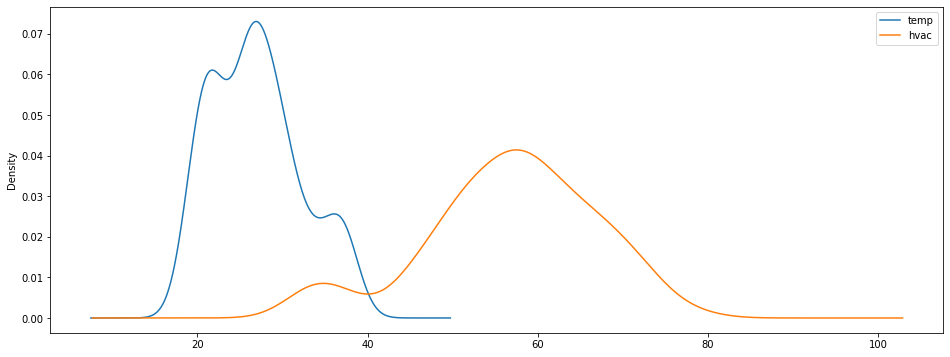

In [49]:
#dataMeanForTemp.set_index('hours', inplace=True)
ser = data2018
ser.plot(x= 'hours', kind='kde',figsize=(16, 6))


<AxesSubplot:ylabel='Density'>

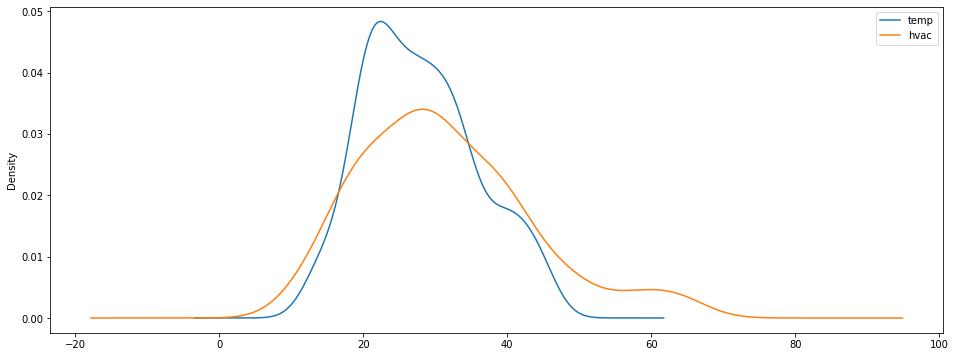

In [50]:
ser = data2019
ser.plot(x= 'hours', kind='kde',figsize=(16, 6))

In [51]:
data2018

,hours,temp,hvac
0,0,21.342903,60.369286
2,0,22.016786,59.879800
4,0,20.903065,61.702609
6,0,21.245333,50.090000
8,0,22.527258,48.169643
...,...,...,...
573,23,27.830161,49.936200
575,23,28.718333,52.298240
577,23,30.805667,58.791994
579,23,29.372500,56.669797


In [52]:
dataHour2018 = pd.DataFrame(data2018.groupby(by=['hours'])['temp','hvac'].mean())


<ipython-input-52-73b0a1d5a46a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataHour2018 = pd.DataFrame(data2018.groupby(by=['hours'])['temp','hvac'].mean())


In [53]:
dataHour2018

,temp,hvac
hours,,
0,24.715200,51.774507
1,24.374819,52.082207
2,23.917504,51.415690
3,23.679643,51.435311
4,23.362364,51.666937
5,23.065268,52.078990
6,22.814995,56.552797
7,22.900121,60.533585
8,23.588570,61.899615


In [54]:
dataHour2019 = pd.DataFrame(data2019.groupby(by=['hours'])['temp','hvac'].mean())


<ipython-input-54-3f806ed7e56d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataHour2019 = pd.DataFrame(data2019.groupby(by=['hours'])['temp','hvac'].mean())


<AxesSubplot:xlabel='hours'>

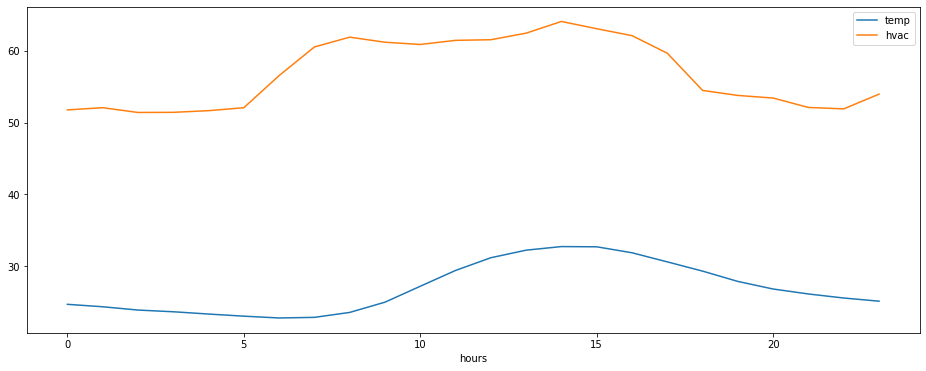

In [55]:

dataHour2018.plot(figsize=(16, 6))

<AxesSubplot:xlabel='hours'>

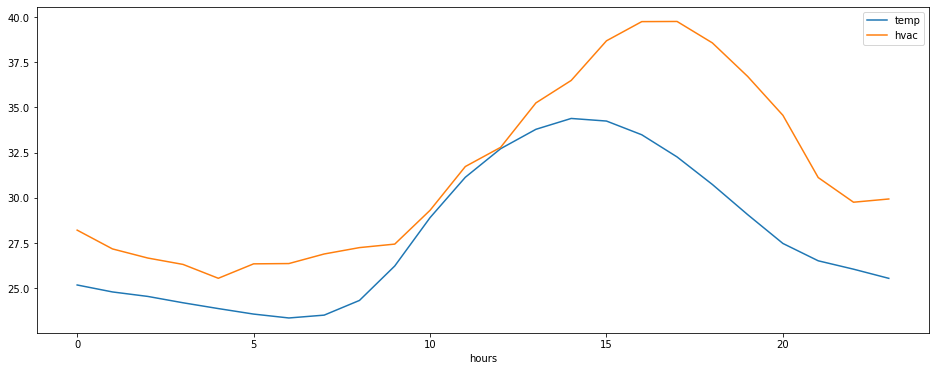

In [56]:
dataHour2019.plot(figsize=(16, 6))

In [57]:
dataHour2018

,temp,hvac
hours,,
0,24.715200,51.774507
1,24.374819,52.082207
2,23.917504,51.415690
3,23.679643,51.435311
4,23.362364,51.666937
5,23.065268,52.078990
6,22.814995,56.552797
7,22.900121,60.533585
8,23.588570,61.899615


In [58]:
dataHour2018.dtypes


temp    float64
hvac    float64
dtype: object

<ipython-input-75-1cfb203d38d4>:18: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x134ddc640>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  legend((line1, line2), ("1", "2"))
<ipython-input-75-1cfb203d38d4>:18: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x132bfd8b0>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  legend((line1, line2), ("1", "2"))


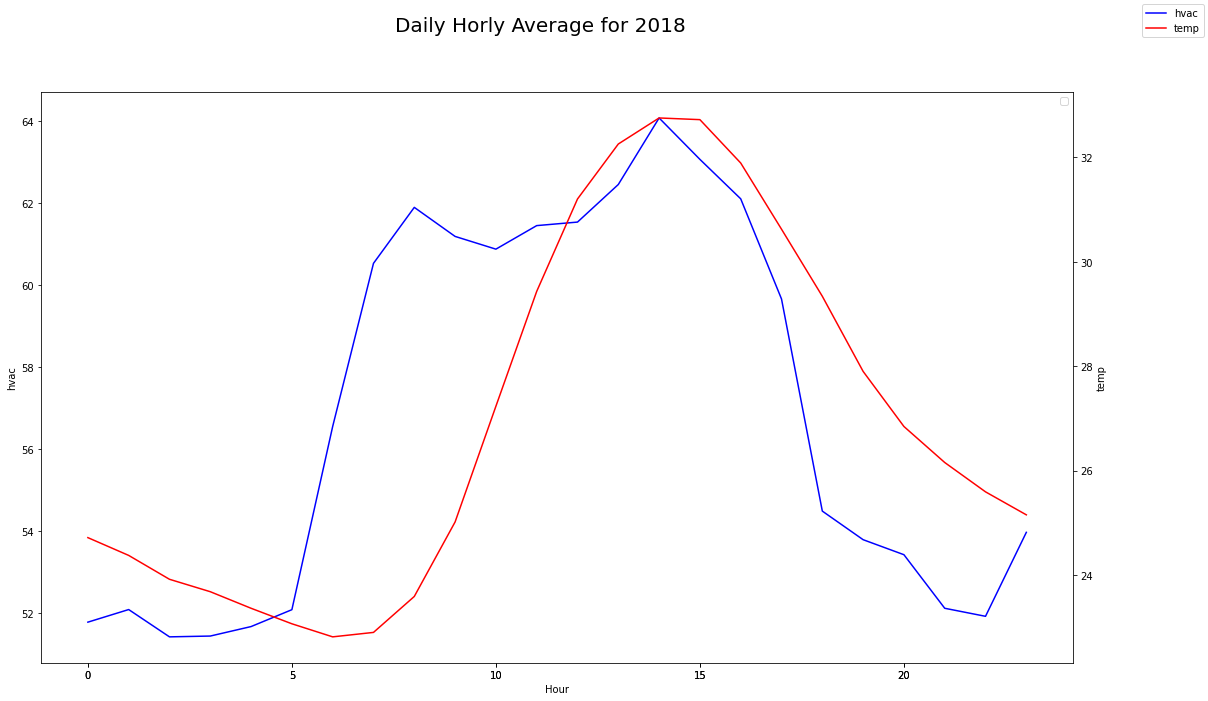

In [75]:
fig1 = figure()
fig1.set_size_inches(18.5, 10.5, forward=True)
fig1.suptitle('Daily Horly Average for 2018', fontsize=20)

ax1 = fig1.add_subplot(111)
line1 = ax1.plot(dataHour2018['hvac'], 'b-')
ylabel("hvac")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2 = ax2.plot(dataHour2018['temp'], '-r')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ylabel("temp")
xlabel("Hour")
 
# for the legend, remember that we used two different axes so, we need 
# to build the legend manually
legend((line1, line2), ("1", "2"))

fig1.legend(('hvac', 'temp'))


show()

<ipython-input-76-298430d7a8e7>:18: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x135184400>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  legend((line1, line2), ("1", "2"))
<ipython-input-76-298430d7a8e7>:18: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x132b376a0>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  legend((line1, line2), ("1", "2"))


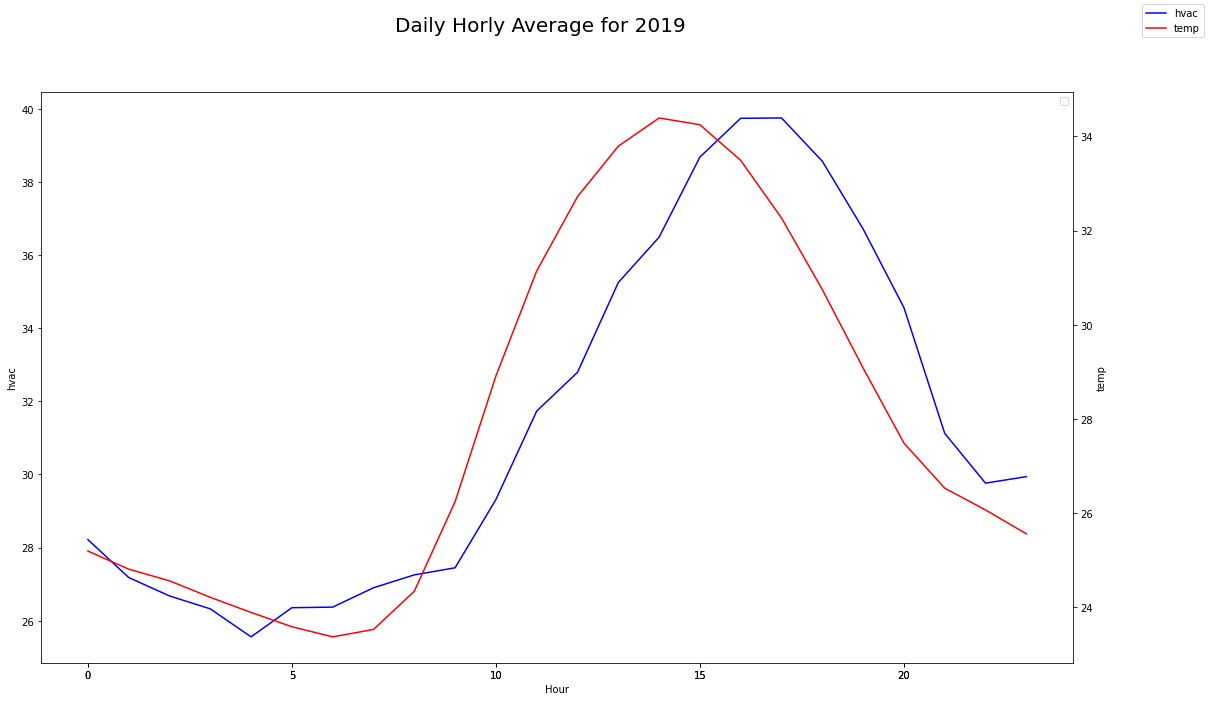

In [76]:
fig1 = figure()
fig1.set_size_inches(18.5, 10.5, forward=True)
fig1.suptitle('Daily Horly Average for 2019', fontsize=20)

ax1 = fig1.add_subplot(111)
line1 = ax1.plot(dataHour2019['hvac'], 'b-')
ylabel("hvac")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2 = ax2.plot(dataHour2019['temp'], '-r')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ylabel("temp")
xlabel("Hour")
 
# for the legend, remember that we used two different axes so, we need 
# to build the legend manually
legend((line1, line2), ("1", "2"))

fig1.legend(('hvac', 'temp'))


show()